In [38]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from plotly.subplots import make_subplots
from pathlib import Path

casos = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/TotalesPorRegion_std.csv')
casos['Fecha'] = pd.to_datetime(casos['Fecha'])
casos_sintomaticos = casos[casos['Categoria']=='Casos nuevos con sintomas'].pivot(index='Fecha', columns='Region', values='Total')
casos_nuevos = casos[casos['Categoria']=='Casos nuevos totales'].pivot(index='Fecha', columns='Region', values='Total')
casos_activos_conf = casos[casos['Categoria']=='Casos activos confirmados'].pivot(index='Fecha', columns='Region', values='Total')
casos_activos_prob = casos[casos['Categoria']=='Casos activos probables'].pivot(index='Fecha', columns='Region', values='Total')
casos_nuevos_prob = casos[casos['Categoria']=='Casos probables acumulados'].pivot(index='Fecha', columns='Region', values='Total').diff()
casos_nuevos_antigeno = casos[casos['Categoria']=='Casos nuevos confirmados por antigeno'].pivot(index='Fecha', columns='Region', values='Total')
casos_sintomaticos.rename(columns={'Total': 'Chile'}, inplace=True)
casos_nuevos.rename(columns={'Total': 'Chile'}, inplace=True)
casos_activos_conf.rename(columns={'Total': 'Chile'}, inplace=True)
casos_activos_prob.rename(columns={'Total': 'Chile'}, inplace=True)
casos_nuevos_prob.rename(columns={'Total': 'Chile'}, inplace=True)
casos_nuevos_antigeno.rename(columns={'Total': 'Chile'}, inplace=True)
casos_nuevos_prob_antigeno = casos_nuevos.add(casos_nuevos_prob, fill_value=0)
casos_nuevos_prob_antigeno = casos_nuevos_prob_antigeno.add(casos_nuevos_antigeno, fill_value=0)

<AxesSubplot:xlabel='Fecha'>

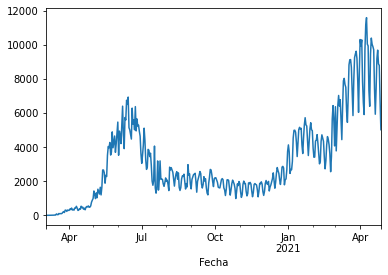

In [39]:
casos_nuevos_prob_antigeno['Chile'].plot()

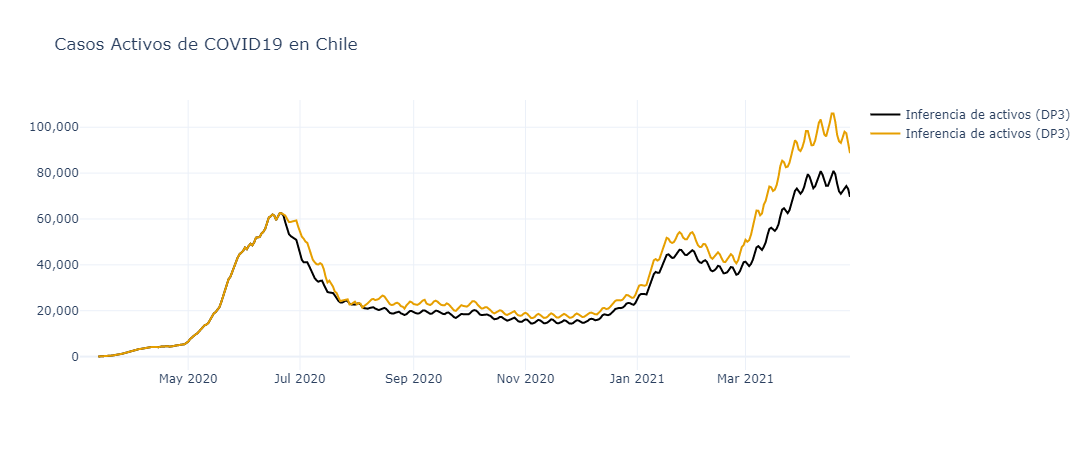

In [40]:
fig = go.Figure()
Wong = ['#000000', '#E69F00', '#56B4E9',
        '#009E73', '#F0E442', '#0072B2',
        '#D55E00', '#CC79A7']


fig.add_trace(
    go.Scatter(x=casos_nuevos.index,
               y=casos_nuevos['Chile'].rolling(11).sum(),
               mode='lines',
               name='Inferencia de activos (DP3)',
               line_color=Wong[0]
              )
)
fig.add_trace(
    go.Scatter(x=casos_nuevos.index,
               y=casos_nuevos_prob_antigeno['Chile'].rolling(11).sum(),
               mode='lines',
               name='Inferencia de activos (DP3)',
               line_color=Wong[1]
              )
)

fig.update_layout(hovermode='x')
fig.update_layout(template='plotly_white',
                  title='Casos Activos de COVID19 en Chile')
fig.update_layout(yaxis_tickformat = ',')



In [44]:
casos_uci = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto8/UCI_T.csv')
casos_uci.rename(columns={'Region': 'Fecha'}, inplace=True)
casos_uci = casos_uci.iloc[2:]
casos_uci['Fecha'] = pd.to_datetime(casos_uci['Fecha'])
casos_uci.set_index('Fecha', inplace=True)
casos_uci['Chile'] = casos_uci[list(casos_uci.columns)].sum(axis=1)

casos_uci

,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Chile
Fecha,,,,,,,,,,,,,,,,,
2020-04-01,0,1,3,0,1,14,83,5,3,7,14,26,1,10,0,5,173
2020-04-02,0,1,4,0,1,17,90,5,3,8,18,29,2,12,0,10,200
2020-04-03,0,1,3,0,1,18,107,5,3,10,21,37,2,18,0,11,237
2020-04-04,0,1,3,0,2,22,129,5,3,11,24,44,2,22,0,12,280
2020-04-05,2,1,3,0,1,27,146,5,4,10,26,44,3,22,0,13,307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-23,30,59,99,28,99,271,1969,157,144,49,232,113,28,88,6,19,3391
2021-04-24,32,58,97,31,100,266,1963,153,137,51,229,114,30,86,7,20,3374
2021-04-25,31,58,92,31,100,274,1937,156,137,49,226,117,29,86,8,22,3353


In [48]:
ucilag = 14
propuci_toto = casos_uci['Chile'].shift(-ucilag)/casos_nuevos_prob_antigeno['Chile'].rolling(11).sum()
propuci_toto.median()

0.03771422787573839